In [ ]:
pip install vaderSentiment

     |████████████████████████████████| 133kB 4.5MB/s 


In [ ]:
from sklearn.linear_model import LinearRegression
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from dateutil.parser import parse
import pandas as pd
import numpy as np
import scipy.stats as sc
import scipy.linalg
import matplotlib.pyplot as plt
%matplotlib inline

analyzer = SentimentIntensityAnalyzer()
model = LinearRegression()

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Facebook.csv to Facebook.csv


In [ ]:
df = pd.read_csv("cleaned_headlines.csv") # from 2/11/2020 to 10/30/2020
df = df.drop(columns=['Unnamed: 0', 'website', 'Nan', 'UserId']) # drop unnecessary columns

headlines = df["Headline"]
sentiments = []
scores = []

for x in headlines:
  all = analyzer.polarity_scores(x)
  sentiments.append(all)
  scores.append(all.get('compound'))

df["Sentiment"] = sentiments  # add column 'Sentiment'
df["Sentiment Score"] = scores  # add column 'Sentiment Score'
df

,Headline,Date,Time,Sentiment,Sentiment Score
0,Coronavirus gets official name from WHO: COVID-19,02/11/2020,10:34:21,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
1,WHO gives the new coronavirus a name: COVID-19,02/11/2020,10:55:52,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
2,Novel Coronavirus officially named 'Covid-19' ...,02/11/2020,11:14:20,"{'neg': 0.0, 'neu': 0.723, 'pos': 0.277, 'comp...",0.3182
3,The World Health Organization says the officia...,02/11/2020,11:43:18,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
4,"Coronavirus officially named Covid-19, says WHO",02/11/2020,11:44:56,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
...,...,...,...,...,...
20481,COVID-19: Remittance Flows to Shrink 14% by 2021,10/30/2020,01:00:06,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
20482,White House advisers warn of ‘unrelenting’ Cov...,10/30/2020,01:08:52,"{'neg': 0.113, 'neu': 0.887, 'pos': 0.0, 'comp...",-0.1027
20483,Eat Out to Help Out 'accelerated second wave o...,10/30/2020,01:13:55,"{'neg': 0.0, 'neu': 0.803, 'pos': 0.197, 'comp...",0.4019
20484,PAGOH: Sukar bagi kerajaan membenarkan pengelu...,10/30/2020,01:56:12,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000


In [ ]:
# February headlines
df_2 = df.loc[0:265,]

# March headlines
df_3 = df.loc[266:3470,]

# April headlines
df_4 = df.loc[3471:7518,]

# May headlines
df_5 = df.loc[7519:10159,]

# June headlines
df_6 = df.loc[10160:12229,]

# July headlines
df_7 = df.loc[12230:14791,]

# August headlines
df_8 = df.loc[14792:17155,]

# September headlines
df_9 = df.loc[17156:18683,]

# October headlines
df_10 = df.loc[18684:20485,]

In [ ]:
days = df.Date.unique()
score_by_day = {}
score_num = {}
price_by_day = {}

for day in days:    # initialize to 0
  score_by_day[day] = 0
  score_num[day] = 0
  price_by_day[parse(day)] = 0

for x in df.iterrows():
  score_by_day[x[1][1]] += x[1][4]   # score_by_day[date] += score
  score_num[x[1][1]] += 1   # counter

for day in score_by_day:
  score_by_day[day] /= score_num[day]

df_scores = pd.DataFrame(score_by_day, index=["Average Sentiment Score By Day"]).T
df_scores

,Average Sentiment Score By Day
02/11/2020,0.085862
02/12/2020,-0.098021
02/13/2020,-0.093167
02/14/2020,0.009190
02/15/2020,0.000000
...,...
10/26/2020,-0.045096
10/27/2020,-0.109511
10/28/2020,-0.030883
10/29/2020,-0.052484


In [ ]:
df_ZM = pd.read_csv("Zoom.csv") # Zoom stock prices downloaded from Yahoo Finance
df_ZM = df_ZM[['Date', 'Adj Close']]
ZM_prices = []

copy = dict.copy(price_by_day)
first = True
prev = 0

for x in df_ZM.iterrows():
  copy[parse(x[1][0])] = x[1][1]   # copy[date] = adj_close
  if first == True:
    prev = x[1][1]  # get initial price
    first = False

for x in copy:    # fill the gap
  if copy[x] != 0:
    ZM_prices.append(copy[x])
    prev = copy[x]
  else:
    ZM_prices.append(prev)
  
#df_ZM_prices = pd.DataFrame(ZM_prices, columns=['Adjusted Close'])  # convert array to dataframe

Coefficient of Determination: 0.042200853193128496
Intercept: [271.48326182]
Slope: [382.64672165]


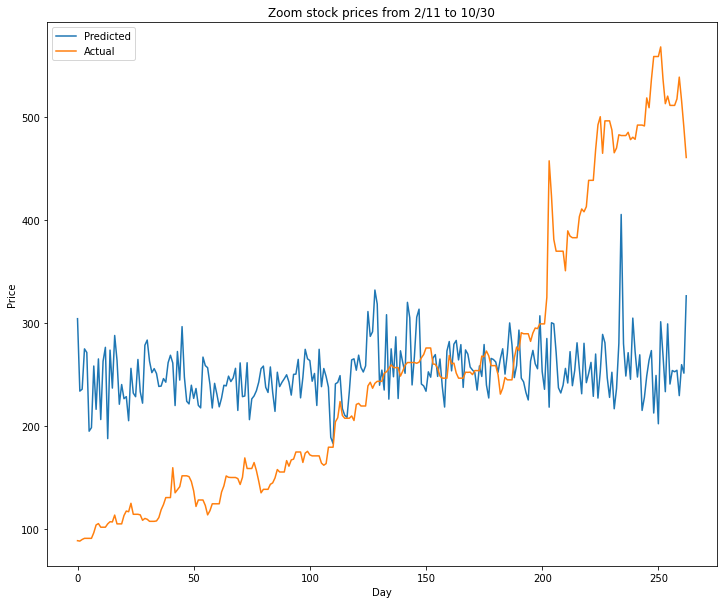

In [ ]:
X_ZM = df_scores.iloc[:,0].values.reshape(-1, 1)   # X = total sentiment score
Y_ZM = df_ZM_prices.iloc[:,0].values.reshape(-1, 1)   # Y = adjusted close

model = model.fit(X_ZM, Y_ZM)   # fits the model using Linear Regression
print('Coefficient of Determination:', model.score(X_ZM, Y_ZM))
print('Intercept:', model.intercept_)
print('Slope:', model.coef_[0])
predict_ZM = model.predict(X_ZM)  # pred = intercept + coeff * x

plt.figure(figsize=(12,10))
plt.plot(predict_ZM, label='Predicted')
plt.plot(ZM_prices, label='Actual')
plt.xlabel("Day")
plt.ylabel("Price")
plt.title('Zoom stock prices from 2/11 to 10/30')
plt.legend();
# In conclusion, linear regression does not work well so we will try other models next.

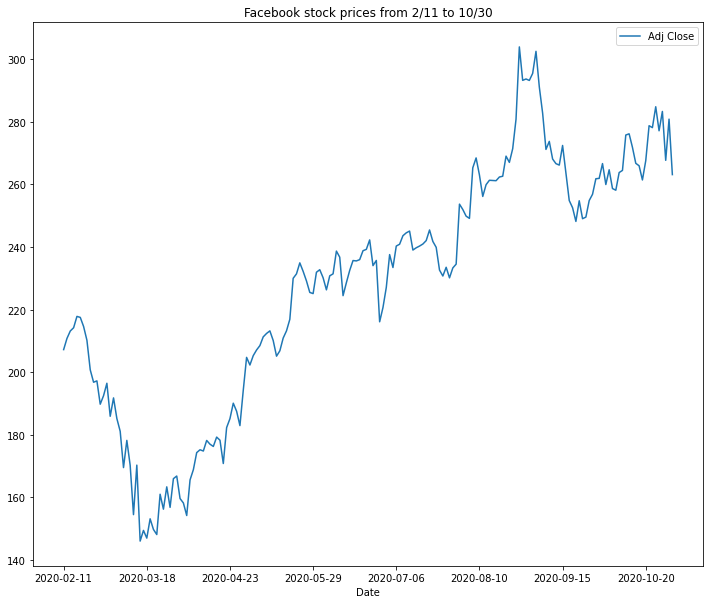

In [ ]:
df_FB = pd.read_csv("Facebook.csv") # Facebook stock prices downloaded from Yahoo Finance
df_FB = df_FB[['Date', 'Adj Close']]
df_FB.plot(x='Date', y='Adj Close', kind='line', figsize=(12,10), title='Facebook stock prices from 2/11 to 10/30')
plt.show()